In [37]:
# Autores: ai-page.readthedocs.io

# Introducción a la series de tiempo

El siguiente cuaderno tiene como objetivo introducir al lector al manejo básico de las series de tiempo en python.

Las librerías necesarias son:
  * pandas
  * matplotlib



In [38]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
url = "https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/AAPL.csv"

In [40]:
df = pd.read_csv(url)

In [41]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086563,70790800


In [42]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


# visualizar
elementos importantes como la tendencia y la estacionariad son importantes para modelar las series financieras, así que es importante poder visualizar.

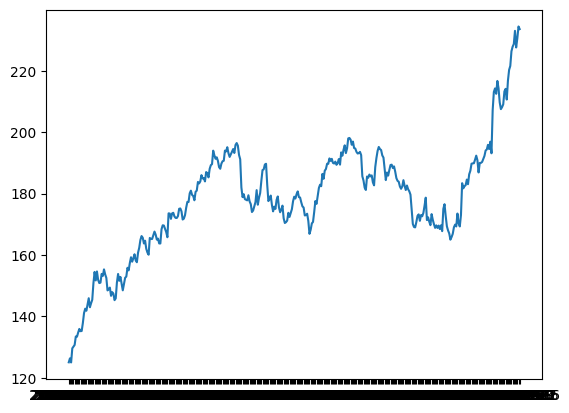

In [43]:
plt.plot(df['Date'], df['Close'])

# Tunning the graph
we can uses:
  * plt.title()
  * plt.xlabel()
  * plt.ylabel()

Text(0.5, 0, 'time')

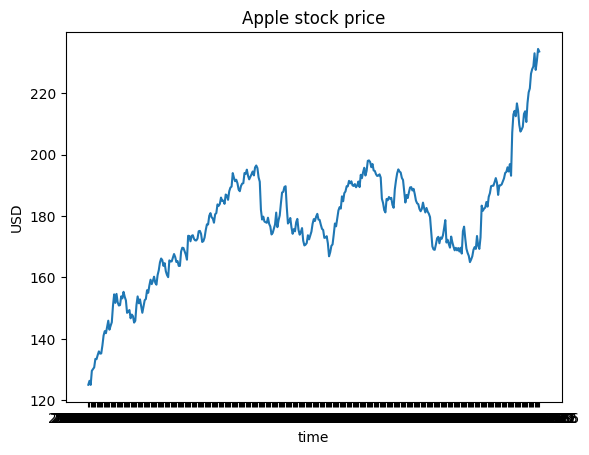

In [44]:
plt.plot(df['Date'], df['Close'])
plt.title("Apple stock price")
plt.ylabel("USD")
plt.xlabel("time")

In [45]:
df['time'] = pd.to_datetime(df['Date'])

In [46]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64
time,datetime64[ns]


Pasar de string to datetime nos permite realizar operaciones sobre las fechas, como extarér el día, sumar etc..


In [47]:
print(df['time'].min())
print(df['time'].max()) # fecha más reciente en la base

2023-01-03 00:00:00
2024-07-16 00:00:00


In [48]:
df['time'].max() - df['time'].min() #timestamp, #timedelta

Timedelta('560 days 00:00:00')

In [49]:
# Extaer información relevante para analizar, por ejempo los días, los meses, etc..
df['day'] = df['time'].dt.day

In [50]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,time,day
380,2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700,2024-07-10,10
381,2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64710600,2024-07-11,11
382,2024-07-12,228.919998,232.639999,228.679993,230.539993,230.539993,53008200,2024-07-12,12
383,2024-07-15,236.479996,237.229996,233.089996,234.399994,234.399994,62549700,2024-07-15,15
384,2024-07-16,235.205002,236.270004,232.330002,233.554993,233.554993,24312488,2024-07-16,16


In [63]:
df['day_name'] = df['time'].dt.day_name()
# prueba con month, year

In [64]:
df['day_name']

,day_name
time,
2023-01-03,Tuesday
2023-01-04,Wednesday
2023-01-05,Thursday
2023-01-06,Friday
2023-01-09,Monday
...,...
2024-07-10,Wednesday
2024-07-11,Thursday
2024-07-12,Friday


In [53]:
# analizar las transacciones en un día particiular puede ser importante...
# podriamos realziar un ejercicio de comparación usando ANOVA?
df

,Date,Open,High,Low,Close,Adj Close,Volume,time,day,day_name
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,2023-01-03,3,Tuesday
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,2023-01-04,4,Wednesday
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700,2023-01-05,5,Thursday
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,2023-01-06,6,Friday
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086563,70790800,2023-01-09,9,Monday
...,...,...,...,...,...,...,...,...,...,...
380,2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700,2024-07-10,10,Wednesday
381,2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64710600,2024-07-11,11,Thursday
382,2024-07-12,228.919998,232.639999,228.679993,230.539993,230.539993,53008200,2024-07-12,12,Friday
383,2024-07-15,236.479996,237.229996,233.089996,234.399994,234.399994,62549700,2024-07-15,15,Monday


In [54]:
# promedio de cierre por día
df.groupby([df["time"].dt.day_name()])['Close'].mean()

,Close
time,
Friday,178.557051
Monday,178.786999
Thursday,177.054616
Tuesday,177.926437
Wednesday,177.101646


In [55]:
# precio de cierre por mes y día de la semana
df.groupby([df["time"].dt.month, df["time"].dt.day_name()])['Close'].mean()
# interesante observe el septimo mes en cada día

time  time     
1     Friday       162.407496
      Monday       164.239998
      Thursday     160.995002
      Tuesday      161.618998
      Wednesday    163.215556
2     Friday       168.037502
      Monday       168.248332
      Thursday     169.884445
      Tuesday      167.783749
      Wednesday    167.361250
3     Friday       163.885554
      Monday       164.050001
      Thursday     162.054443
      Tuesday      163.782499
      Wednesday    162.444444
4     Friday       168.620002
      Monday       167.696665
      Thursday     168.258749
      Tuesday      166.865556
      Wednesday    166.212500
5     Friday       181.695557
      Monday       178.341428
      Thursday     179.243333
      Tuesday      179.267778
      Wednesday    178.573999
6     Friday       194.996667
      Monday       194.371427
      Thursday     195.084444
      Tuesday      195.056250
      Wednesday    193.881430
7     Friday       204.336665
      Monday       205.403751
      Thursday     199.254001
      Tuesday      209.655831
      Wednesday    204.205002
8     Friday       178.220001
      Monday       178.585003
      Thursday     181.478000
      Tuesday      182.841998
      Wednesday    183.222000
9     Friday       177.729999
      Monday       177.803335
      Thursday     174.479999
      Tuesday      179.257503
      Wednesday    175.760002
10    Friday       174.360004
      Monday       174.950000
      Thursday     174.492504
      Tuesday      174.429999
      Wednesday    175.100002
11    Friday       185.677498
      Monday       186.317497
      Thursday     184.910004
      Tuesday      187.575000
      Wednesday    185.109998
12    Friday       194.130005
      Monday       192.833328
      Thursday     195.160000
      Tuesday      194.530002
      Wednesday    194.565002
Name: Close, dtype: float64

In [56]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,time,day,day_name
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,2023-01-03,3,Tuesday
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,2023-01-04,4,Wednesday
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700,2023-01-05,5,Thursday
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,2023-01-06,6,Friday
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086563,70790800,2023-01-09,9,Monday
...,...,...,...,...,...,...,...,...,...,...
380,2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700,2024-07-10,10,Wednesday
381,2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64710600,2024-07-11,11,Thursday
382,2024-07-12,228.919998,232.639999,228.679993,230.539993,230.539993,53008200,2024-07-12,12,Friday
383,2024-07-15,236.479996,237.229996,233.089996,234.399994,234.399994,62549700,2024-07-15,15,Monday


Text(0, 0.5, 'mean price')

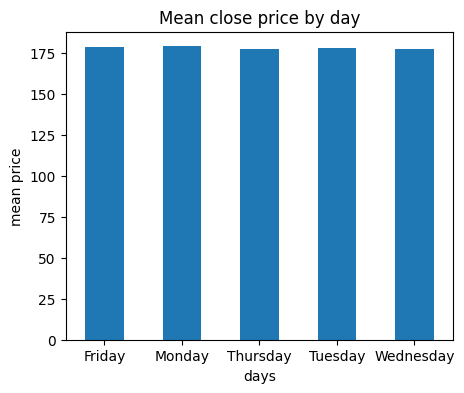

In [57]:
# gráficando el día
fig, axs = plt.subplots(figsize=(5,4))
df.groupby(df["time"].dt.day_name())["Close"].mean().plot(
    kind='bar', rot=0, ax=axs)
plt.title("Mean close price by day")
plt.xlabel("days")
plt.ylabel("mean price")

In [58]:
# datetime como index
df.set_index(df['time'], inplace=True) #Una ventaja  el ajuste de las fechas

In [59]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,time,day,day_name
time,,,,,,,,,,
2023-01-03,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048042,112117500,2023-01-03,3,Tuesday
2023-01-04,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,2023-01-04,4,Wednesday
2023-01-05,2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700,2023-01-05,5,Thursday
2023-01-06,2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,2023-01-06,6,Friday
2023-01-09,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086563,70790800,2023-01-09,9,Monday
...,...,...,...,...,...,...,...,...,...,...
2024-07-10,2024-07-10,229.300003,233.080002,229.250000,232.979996,232.979996,62627700,2024-07-10,10,Wednesday
2024-07-11,2024-07-11,231.389999,232.389999,225.770004,227.570007,227.570007,64710600,2024-07-11,11,Thursday
2024-07-12,2024-07-12,228.919998,232.639999,228.679993,230.539993,230.539993,53008200,2024-07-12,12,Friday


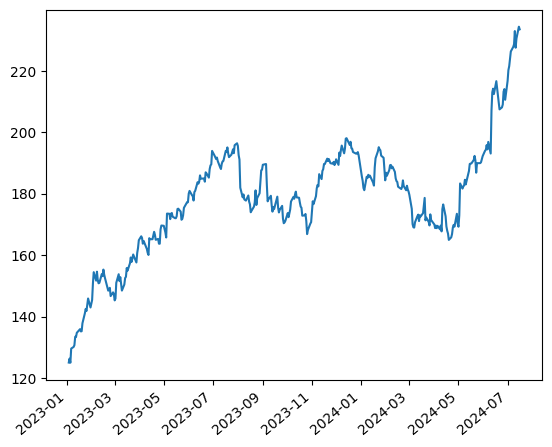

In [60]:
plt.plot(df['Close'])
plt.xticks(rotation=40, ha='right'); #not show text

In [61]:
# determinando el índice podemos usar el slicing...
df['2024-04-01':'2024-04-24']

,Date,Open,High,Low,Close,Adj Close,Volume,time,day,day_name
time,,,,,,,,,,
2024-04-01,2024-04-01,171.190002,171.250000,169.479996,170.029999,169.799698,46240500,2024-04-01,1,Monday
2024-04-02,2024-04-02,169.080002,169.339996,168.229996,168.839996,168.611298,49329500,2024-04-02,2,Tuesday
2024-04-03,2024-04-03,168.789993,170.679993,168.580002,169.649994,169.420197,47691700,2024-04-03,3,Wednesday
2024-04-04,2024-04-04,170.289993,171.919998,168.820007,168.820007,168.591339,53704400,2024-04-04,4,Thursday
2024-04-05,2024-04-05,169.589996,170.389999,168.949997,169.580002,169.350296,42055200,2024-04-05,5,Friday
2024-04-08,2024-04-08,169.029999,169.199997,168.240005,168.449997,168.221832,37425500,2024-04-08,8,Monday
2024-04-09,2024-04-09,168.699997,170.080002,168.350006,169.669998,169.440170,42451200,2024-04-09,9,Tuesday
2024-04-10,2024-04-10,168.800003,169.089996,167.110001,167.779999,167.552734,49709300,2024-04-10,10,Wednesday
2024-04-11,2024-04-11,168.339996,175.460007,168.160004,175.039993,174.802902,91070300,2024-04-11,11,Thursday


<Axes: xlabel='time'>

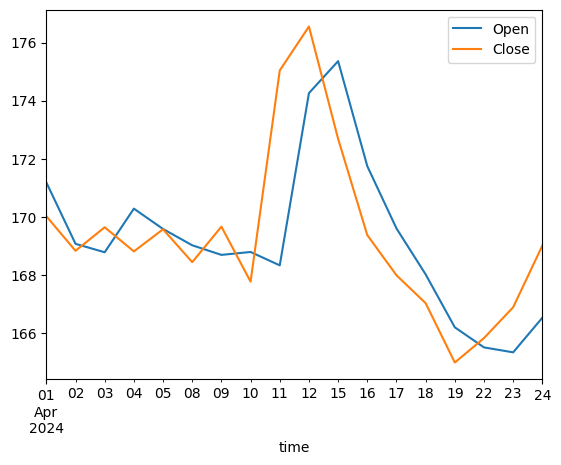

In [62]:
df['2024-04-01':'2024-04-24'][['Open', 'Close']].plot()